In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from IPython.core.display import HTML
import datetime
import numpy as np
import numpy.ma as ma
import pickle
import matplotlib.cm as cm

In [2]:
#year = 18
year = 19; w = 543 # w is the mid-season cutoff in stats table

In [3]:
save = os.getcwd()
save = os.path.join(save,"save")
save = os.path.join(save,str(year))

save_bids = os.path.join(save,'allbids.pickle')

with open(save_bids, 'rb') as f:
    df_bids = pickle.load(f)
    
df_bids['Player'] = df_bids['Player'].str.strip()
df_bids['Level'] = df_bids['Level'].astype(int)
df_bids['Round'] = df_bids['Round'].astype(int)
df_bids['Success'] = df_bids['Success'].astype(bool)
    
save_stats = os.path.join(save,'df.pickle')

with open(save_stats, 'rb') as f:
    df_stats = pickle.load(f)

In [4]:
#add points last season to bids table by mapping player names using stats table
points_last_list = df_stats['Points Last Season'].fillna(0).tolist()
name_list = df_stats['Name'].tolist()
name_to_points_last = dict(zip(name_list,points_last_list))
df_bids['Points Last Season'] = df_bids['Player'].map(name_to_points_last)

# Label each bid round by auction or in season

In [80]:
dfa = df_bids[df_bids['Player'] == "Nicolas Pepe"]
df_pepe = dfa.groupby("Division").min().reset_index()

#It might be better to do it by this and take the round after success average == 1
#d_div_r = df_bids.groupby(["Division","Round"]).mean()

In [88]:
divs = df_pepe.Division.to_list()
trounds = df_pepe.Round.to_list()
tstart = dict(zip(divs,trounds))

In [107]:
def a_or_t(x):
    div = x[0]
    rnd = x[1]
    rt = tstart[div]
    if rnd < rt:
        return "Auction"
    elif rnd >= rt:
        return "Transfer"

In [109]:
df_enhanced = df_bids.copy()
index_names = df_enhanced[ df_enhanced['Level'] >= 6 ].index
df_enhanced.drop(index_names, inplace = True)
df_enhanced["RoundType"] = df_enhanced[["Division","Round"]].apply(a_or_t, axis=1)
df_enhanced

,Division,Level,Round,Player,Manager,Team,Position,Amount,Success,Points Last Season,RoundType
0,1,1,1,Alisson,Owen Griffiths,Loko Bakayoko,Goalkeeper,0.0,True,96.0,Auction
1,1,1,1,Kepa Arrizabalaga,Andy Carr,Carr Trouble,Goalkeeper,7.5,True,0.0,Auction
2,1,1,1,Kepa Arrizabalaga,Matt Davis,Stand Up for the Champion,Goalkeeper,3.0,False,0.0,Auction
3,1,1,1,David de Gea,Dave Savery,SmokeCrack Mountain FC,Goalkeeper,7.0,True,36.0,Auction
4,1,1,1,Ederson,Alex Silverman,Vandelay Industries,Goalkeeper,21.0,True,95.0,Auction
...,...,...,...,...,...,...,...,...,...,...,...
8916,5f,5,14,Oliver Norwood,Philip White,Allez Les Blancs,Midfielder,0.0,True,0.0,Transfer
8917,5f,5,14,Allan Saint-Maximin,Ian Pardoe,Legster,Midfielder,1.0,True,0.0,Transfer
8918,5f,5,14,Jonjo Shelvey,S McBride,Orwell Road,Midfielder,0.0,True,15.0,Transfer
8919,5f,5,14,Dwight Gayle,Anthony Andrews,No Saints,Forward,0.0,True,0.0,Transfer


In [114]:
dfa = df_enhanced[df_enhanced['RoundType'] == "Transfer"]
dfa = dfa[dfa['Position'] == "Defender"]
display(HTML(dfa.sort_values(by=['Amount','Player'],ascending=False).to_html()))

,Division,Level,Round,Player,Manager,Team,Position,Amount,Success,Points Last Season,RoundType
4511,4b,4,15,Aymeric Laporte,Sam and Rik Locke,Run The Kewell's,Defender,21.0,True,98.0,Transfer
4535,4b,4,15,Virgil van Dijk,Dan Woodcock,Dressing Gown Town,Defender,20.0,True,112.0,Transfer
4527,4b,4,15,Luke Shaw,Mehmet Yatbaz,Memo United,Defender,20.0,True,44.0,Transfer
4541,4b,4,15,Jan Vertonghen,M Star,MNStar All Stars,Defender,20.0,True,36.0,Transfer
4509,4b,4,15,Sead Kolasinac,Sam and Rik Locke,Run The Kewell's,Defender,18.5,True,39.0,Transfer
4544,4b,4,15,Kyle Walker,Steve Bidmead,Doomed,Defender,18.5,True,84.0,Transfer
4534,4b,4,15,Kieran Trippier,M Star,MNStar All Stars,Defender,18.5,True,60.0,Transfer
1905,3a,3,6,Joao Cancelo,Paul Youlten,CF Blanquiazules,Defender,18.0,True,0.0,Transfer
4505,4b,4,15,Joe Gomez,David Dutt,Head Dutt,Defender,17.0,True,32.0,Transfer
4506,4b,4,15,Joe Gomez,Mehmet Yatbaz,Memo United,Defender,16.5,False,32.0,Transfer


## Specific Round bids

In [72]:
dfa = df_bids[df_bids['Division'] == "7b"]
#dfa = dfa[dfa['Round'] == 12]
#dfa = dfa[dfa['Position'] == "Forward"]
display(HTML(dfa.sort_values(by=['Round','Player'],ascending=False).to_html()))

,Division,Level,Round,Player,Manager,Team,Position,Amount,Success,Points Last Season
15067,7b,7,9,Oumar Niasse,Daniel Needleman,The Needlemen,Forward,0.0,True,12.0
15065,7b,7,9,Nathaniel Clyne,Robb Parris,Parris St. Germain,Defender,0.0,True,12.0
15066,7b,7,9,Kiko Femenia,Tom Evans,Allez Les Bleus,Defender,0.0,True,19.0
15064,7b,7,8,Yoshinori Muto,Ben Davenport,Davvys Destroyers,Forward,0.0,True,8.0
15058,7b,7,8,Wes Morgan,Daniel Needleman,The Needlemen,Defender,0.0,True,37.0
15059,7b,7,8,Pablo Zabaleta,Robb Parris,Parris St. Germain,Defender,0.0,True,23.0
15060,7b,7,8,Pablo Zabaleta,Daniel Needleman,The Needlemen,Defender,0.0,False,23.0
15061,7b,7,8,Kurt Zouma,Dom Leitao,Dom Dominators,Defender,0.0,True,49.0
15062,7b,7,8,Kurt Zouma,Robb Parris,Parris St. Germain,Defender,0.0,False,49.0
15063,7b,7,8,Kurt Zouma,Tom Evans,Allez Les Bleus,Defender,0.0,False,49.0


## Specific Player bids

In [140]:
df_stats.iloc[w:].Name.to_list()

['James Justin',
 'Moritz Leitner',
 'Sebastien Haller',
 'Bailey Peacock-Farrell',
 'Adrian',
 'Scott Carson',
 'Michael Verrips',
 'Jesus Vallejo',
 'Jetro Willems',
 'Adam Webster',
 'Gary Cahill',
 'Goncalo Cardosa',
 'Joao Cancelo',
 'Djibril Sidibe',
 'Emil Krafth',
 'Romaric Yapi',
 'Kieran Tierney',
 'Aaron Mooy',
 'Philip Billing',
 'Ryan Sessegnon',
 'Victor Camarasa',
 'Trezeguet',
 'Dani Ceballos',
 'Douglas Luiz',
 'Ben Osborn',
 'Arnaut Danjuma',
 'Marvelous Nakamba',
 'Nicolas Pepe',
 'Allan Saint-Maximin',
 'Pedro Neto',
 'Bruno Jordao',
 'Jean-Philippe Gbamin',
 'Ibrahim Amadou',
 'Ismaila Sarr',
 'Giovani Lo Celso',
 'Dennis Praet',
 'Andy Carroll',
 'Danny Welbeck',
 'Jordan Ayew',
 'Joelinton',
 'Patrick Cutrone',
 'Oliver McBurnie',
 'Moise Kean',
 'Neal Maupay',
 'Albian Ajeti',
 'Kevin Danso',
 'Aaron Ramsdale',
 'Gabriel Martinelli',
 'Heurelho Gomes',
 'Andy Lonergan',
 'Coaimhin Kelleher',
 'Billy Gilmour',
 'Aaron Connolly',
 'Eric Garcia',
 'Dimitri Foulquie

In [144]:
player="Joao Cancelo"

<BarContainer object of 36 artists>

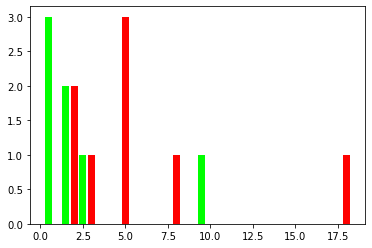

In [145]:
spef_bids = df_bids[df_bids.Player==player].Amount
pmax = spef_bids.max()
x = 0.01
nums,bins = np.histogram(spef_bids, np.arange(0.5-x,pmax+1-x,0.5))
vals = np.arange(0.5,pmax+0.5,0.5)
c = cm.brg((vals%1)+0.5)
plt.bar(vals,nums,width=0.4,color=c)

In [146]:
dfa = df_enhanced[df_enhanced['Player'] == player]
display(HTML(dfa.sort_values(by=['Division','Round'],ascending=True).to_html()))

,Division,Level,Round,Player,Manager,Team,Position,Amount,Success,Points Last Season,RoundType
417,1,1,6,Joao Cancelo,Aaron Mundy,Charlton All Stars,Defender,0.5,True,0.0,Transfer
1203,2,2,7,Joao Cancelo,Ben Ransom,Ransom and the Rockettes,Defender,2.0,True,0.0,Transfer
1204,2,2,7,Joao Cancelo,Raza Sheikh,Villans,Defender,0.0,False,0.0,Transfer
1205,2,2,7,Joao Cancelo,Peter Cloonan,The Quest for Redemption,Defender,0.0,False,0.0,Transfer
1905,3a,3,6,Joao Cancelo,Paul Youlten,CF Blanquiazules,Defender,18.0,True,0.0,Transfer
1906,3a,3,6,Joao Cancelo,Sai Raja,Faké Madrid,Defender,9.5,False,0.0,Transfer
1907,3a,3,6,Joao Cancelo,Alun Lloyd,The 95th Alien Rifles,Defender,3.0,False,0.0,Transfer
2537,3b,3,5,Joao Cancelo,Richard Davis,AFC Rickaay,Defender,1.5,True,0.0,Transfer
3678,4a,4,6,Joao Cancelo,Dino Baggio,Bentekefriedchicken,Defender,0.0,True,0.0,Transfer
5080,4c,4,7,Joao Cancelo,Chris Beech,SonOfABeech,Defender,0.0,True,0.0,Transfer
